Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
Sample tree coordinates:
  Pinus strobus: Lon=-68.203147, Lat=44.555107
  Pinus strobus: Lon=-70.16011, Lat=44.520921
  Pinus strobus: Lon=-70.15583, Lat=44.666738
  Pinus strobus: Lon=-68.237019, Lat=46.072198
  Pinus strobus: Lon=-68.666415, Lat=44.91266
  Pinus strobus: Lon=-70.148889, Lat=44.678617
  Pinus strobus: Lon=-69.134132, Lat=44.513539
  Pinus strobus: Lon=-68.045167, Lat=44.800372
  Pinus strobus: Lon=-69.620042, Lat=46.079464
  Pinus strobus: Lon=-69.501847, Lat=46.086558
Records by species:
species
Abies balsamea       91
Betula papyrifera    86
Tsuga canadensis     75
Acer rubrum          64
Pinus strobus        52
Picea abies          13
Name: count, dtype: int64
Found 80 Sentinel-2 files

Checking bounds of first 3 Sentinel-2 files:
File: sentinel2_composite_2018-00

Processing Sentinel-2 files:   0%|          | 0/80 [00:00<?, ?it/s]

Processing sentinel2_composite_2018-0000000000-0000000000.tif - Year: 2018, Bands: 14
Processing sentinel2_composite_2018-0000000000-0000008960.tif - Year: 2018, Bands: 14
  No valid pixels found in buffer for Abies balsamea
  No valid pixels found in buffer for Acer rubrum
  Found 98 valid pixels in buffer for Acer rubrum, using average
  No valid pixels found in buffer for Acer rubrum
Processing sentinel2_composite_2018-0000000000-0000017920.tif - Year: 2018, Bands: 14
  No valid pixels found in buffer for Pinus strobus
  No valid pixels found in buffer for Pinus strobus
  No valid pixels found in buffer for Abies balsamea
  No valid pixels found in buffer for Acer rubrum
  No valid pixels found in buffer for Betula papyrifera
  No valid pixels found in buffer for Betula papyrifera
Processing sentinel2_composite_2018-0000000000-0000026880.tif - Year: 2018, Bands: 14
  No valid pixels found in buffer for Acer rubrum
  No valid pixels found in buffer for Picea abies
Processing sentinel

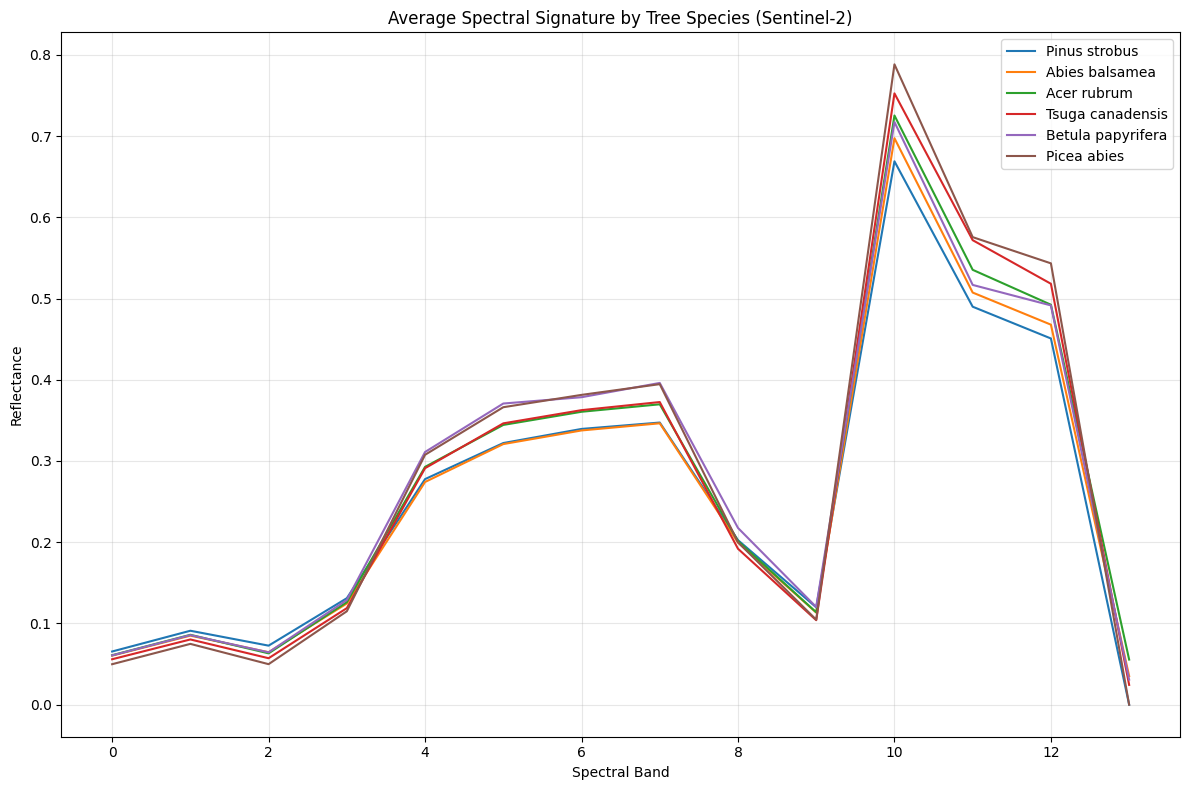

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.1993 - loss: 1.7791 - val_accuracy: 0.2581 - val_loss: 1.7391
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2741 - loss: 1.7243 - val_accuracy: 0.2581 - val_loss: 1.6922
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2423 - loss: 1.7029 - val_accuracy: 0.2581 - val_loss: 1.6735
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2289 - loss: 1.6853 - val_accuracy: 0.2581 - val_loss: 1.6686
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2347 - loss: 1.6722 - val_accuracy: 0.2581 - val_loss: 1.6675
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2279 - loss: 1.6752 - val_accuracy: 0.2419 - val_loss: 1.6696
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2618 - loss: 1.6529 - val_accuracy: 0.2581 - val_loss: 1.6690
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2229 - loss: 1.7068 - val_accuracy: 0.2581 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


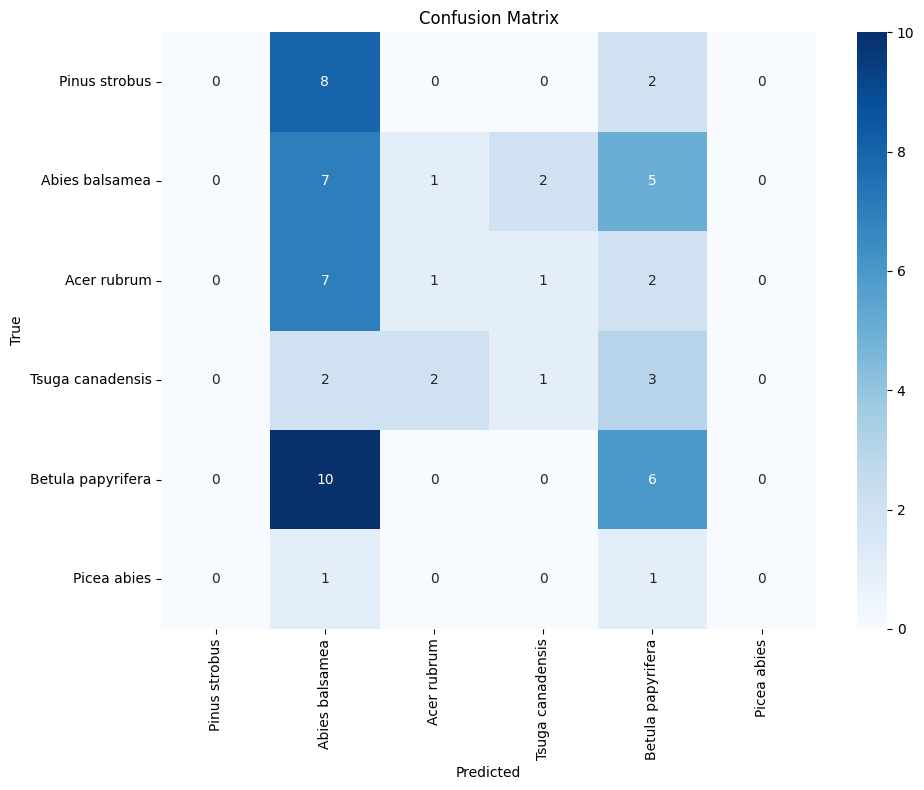

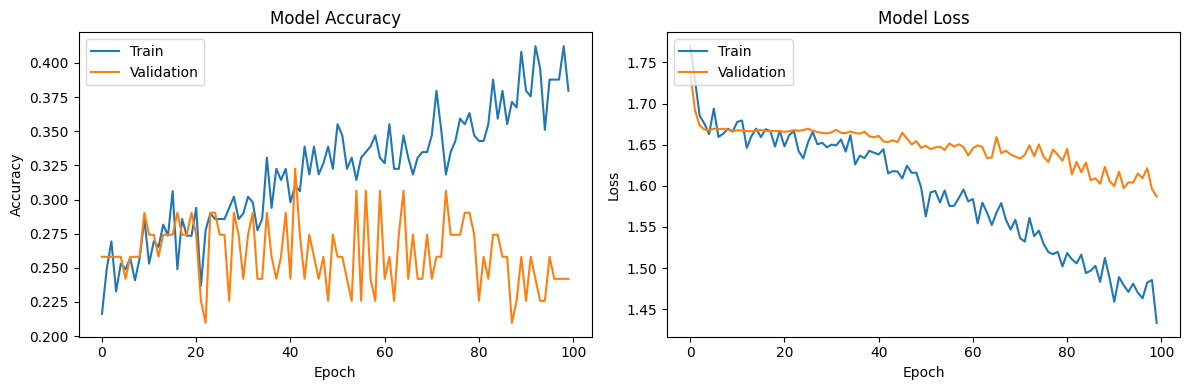

Model saved to tree_species_cnn_model.h5


In [ ]:
!pip install rasterio geopandas matplotlib scikit-learn tqdm

import numpy as np
import pandas as pd
import rasterio
import os
import re
from sklearn.model_selection import train_test_split
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

data_dir = '/content/drive/My Drive/tree_migration_project/sentinel-2'
species_file = '/content/drive/My Drive/tree_migration_project/all_species.csv'


if not os.path.exists(species_file):
    print(f"Error: {species_file} not found!")
    raise FileNotFoundError(f"Species data not found at {species_file}")

species_df = pd.read_csv(species_file)

species_names = ['Pinus strobus', 'Abies balsamea', 'Acer rubrum',
                'Tsuga canadensis', 'Betula papyrifera', 'Picea abies']
species_dict = {name: i for i, name in enumerate(species_names)}

print("Sample tree coordinates:")
for i, row in species_df.head(10).iterrows():
    print(f"  {row['species']}: Lon={row['decimalLongitude']}, Lat={row['decimalLatitude']}")

print("Records by species:")
print(species_df['species'].value_counts())

def extract_spectral_signatures():
    """Extract spectral signatures at known tree locations from Sentinel-2 imagery"""
    X = []
    y = []
    metadata = []

    total_observations = 0
    outside_bounds = 0
    invalid_pixels = 0
    valid_samples = 0

    # Sentinel-2 files
    sentinel_files = glob.glob(os.path.join(data_dir, 'sentinel2_composite_*.tif'))
    print(f"Found {len(sentinel_files)} Sentinel-2 files")

    # Check the first few files to understand their bounds
    print("\nChecking bounds of first 3 Sentinel-2 files:")
    for sentinel_file in sentinel_files[:3]:
        try:
            with rasterio.open(sentinel_file) as src:
                bounds = src.bounds
                print(f"File: {os.path.basename(sentinel_file)}")
                print(f"  Bounds: {bounds} (left, bottom, right, top)")
                print(f"  Width: {src.width}, Height: {src.height}")
        except Exception as e:
            print(f"Error reading {sentinel_file}: {str(e)}")

    if len(sentinel_files) == 0:
        print("No Sentinel-2 files found!")
        return None, None

    for sentinel_file in tqdm(sentinel_files, desc="Processing Sentinel-2 files"):
        year_match = re.search(r'sentinel2_composite_(\d{4})', os.path.basename(sentinel_file))
        if not year_match:
            print(f"Couldn't extract year from {sentinel_file}, skipping")
            continue
        year = int(year_match.group(1))

        # alternate years approach
        try:
            with rasterio.open(sentinel_file) as src:
                transform = src.transform
                crs = src.crs
                bounds = src.bounds
                bands = src.count

                print(f"Processing {os.path.basename(sentinel_file)} - Year: {year}, Bands: {bands}")
                sentinel_data = src.read()
                for _, row in species_df.iterrows():
                    total_observations += 1
                    species = row['species']
                    lon = row['decimalLongitude']
                    lat = row['decimalLatitude']
                    original_year = row['year']

                    row_idx, col_idx = rasterio.transform.rowcol(transform, lon, lat)

                    if not (0 <= row_idx < src.height and 0 <= col_idx < src.width):
                        outside_bounds += 1
                        continue

                    buffer_size = 15
                    valid_pixels = []

                    for i in range(-buffer_size//2, buffer_size//2 + 1):
                        for j in range(-buffer_size//2, buffer_size//2 + 1):
                            r = row_idx + i
                            c = col_idx + j
                            if 0 <= r < src.height and 0 <= c < src.width:
                                pixel_value = sentinel_data[:, r, c]
                                if not np.all(np.isnan(pixel_value)) and np.sum(pixel_value) > 0:
                                    valid_pixels.append(pixel_value)

                    if valid_pixels:
                        avg_pixel = np.mean(valid_pixels, axis=0)
                        valid_samples += 1
                        X.append(avg_pixel)
                        y.append(species_dict[species])
                        metadata.append({
                            'species': species,
                            'original_year': original_year,
                            'sentinel_year': year,
                            'lon': lon,
                            'lat': lat,
                            'valid_pixels_count': len(valid_pixels)
                        })
                        print(f"  Found {len(valid_pixels)} valid pixels in buffer for {species}, using average")
                    else:
                        invalid_pixels += 1
                        print(f"  No valid pixels found in buffer for {species}")
        except Exception as e:
            print(f"Error processing {sentinel_file}: {str(e)}")
            continue

    if len(X) == 0:
        print("No valid spectral signatures extracted!")
        return None, None

    X = np.array(X)
    y = np.array(y)

    metadata_df = pd.DataFrame(metadata)
    metadata_df.to_csv('/content/drive/My Drive/tree_migration_project/sentinel_species_spectral_metadata.csv', index=False)

    print(f"\nSummary statistics:")
    print(f"Total observations processed: {total_observations}")
    if total_observations > 0:
        print(f"Points outside image bounds: {outside_bounds} ({outside_bounds/total_observations*100:.1f}%)")
        print(f"Points with invalid pixel values: {invalid_pixels} ({invalid_pixels/total_observations*100:.1f}%)")
        print(f"Valid samples extracted: {valid_samples} ({valid_samples/total_observations*100:.1f}%)")
    else:
        print("No observations processed")

    return X, y

# extract spectral signatures
X, y = extract_spectral_signatures()

if X is None or y is None:
    print("Failed to extract spectral data. Exiting.")
else:
    print("\nSamples extracted per species:")
    for species_name, idx in species_dict.items():
        count = np.sum(y == idx)
        print(f"  {species_name}: {count} samples")

    print(f"\nShape X: {X.shape}, Shape y: {y.shape}")
    print(f"Total samples extracted: {len(X)}")

    class_counts = np.bincount(y)
    min_samples_per_class = np.min(class_counts[class_counts > 0])
    print(f"Minimum samples for any class: {min_samples_per_class}")

    # train test split
    if min_samples_per_class < 2:
        print("WARNING: Some classes have fewer than 2 samples, using regular train_test_split without stratification")
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
    else:
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

    # Save data for model training
    np.save('/content/drive/My Drive/tree_migration_project/sentinel_X_train.npy', X_train)
    np.save('/content/drive/My Drive/tree_migration_project/sentinel_X_val.npy', X_val)
    np.save('/content/drive/My Drive/tree_migration_project/sentinel_y_train.npy', y_train)
    np.save('/content/drive/My Drive/tree_migration_project/sentinel_y_val.npy', y_val)

    # Basic stats
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Feature shape: {X[0].shape}")
    print("Class distribution:")
    for species, idx in species_dict.items():
        count = np.sum(y == idx)
        print(f"  {species}: {count} samples ({count/len(y)*100:.1f}%)")

#visualize Spectral Signatures
if X is not None and y is not None:
    # Create band names list for Sentinel-2
    band_names = ['Blue', 'Green', 'Red', 'Red Edge 1', 'Red Edge 2', 'Red Edge 3',
                'NIR', 'NIR2', 'SWIR1', 'SWIR2', 'NDVI', 'NBR', 'NDRE']

    # avg spectral signature per species
    plt.figure(figsize=(12, 8))
    for species, idx in species_dict.items():
        mask = y == idx
        if np.any(mask):
            avg_signature = np.mean(X[mask], axis=0)
            plt.plot(range(len(avg_signature)), avg_signature, label=species)

    # add band names on x-axis if they match the feature dimension
    if X.shape[1] <= len(band_names):
        plt.xticks(range(X.shape[1]), band_names[:X.shape[1]], rotation=45)
    else:
        plt.xlabel('Spectral Band')

    plt.ylabel('Reflectance')
    plt.title('Average Spectral Signature by Tree Species (Sentinel-2)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/tree_migration_project/sentinel_average_spectral_signatures.png')
    plt.show()

# simple CNN Model
if X is not None and y is not None:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns

    X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train_reshaped, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_reshaped, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    y_pred = np.argmax(model.predict(X_val_reshaped), axis=1)
    print(classification_report(y_val, y_pred, target_names=species_names))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=species_names, yticklabels=species_names)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/tree_migration_project/confusion_matrix.png')
    plt.show()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/tree_migration_project/training_history.png')
    plt.show()

    model.save('/content/drive/My Drive/tree_migration_project/tree_species_cnn_model.h5')
    print("Model saved to tree_species_cnn_model.h5")

Class weights:
  Pinus strobus: 1.05
  Abies balsamea: 0.66
  Acer rubrum: 0.95
  Tsuga canadensis: 1.24
  Betula papyrifera: 0.66
  Picea abies: 6.81

Random Forest Accuracy: 0.29

Classification Report:
                   precision    recall  f1-score   support

    Pinus strobus       0.27      0.30      0.29        10
   Abies balsamea       0.31      0.33      0.32        15
      Acer rubrum       0.10      0.09      0.10        11
 Tsuga canadensis       0.17      0.12      0.14         8
Betula papyrifera       0.42      0.50      0.46        16
      Picea abies       0.00      0.00      0.00         2

         accuracy                           0.29        62
        macro avg       0.21      0.22      0.22        62
     weighted avg       0.27      0.29      0.28        62



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


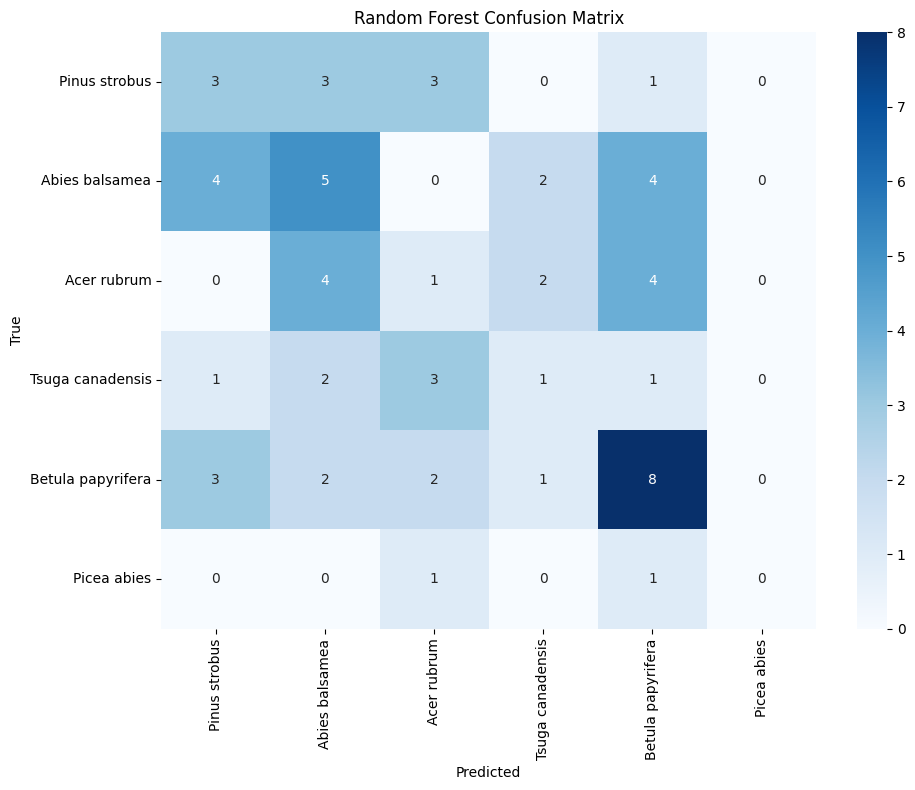

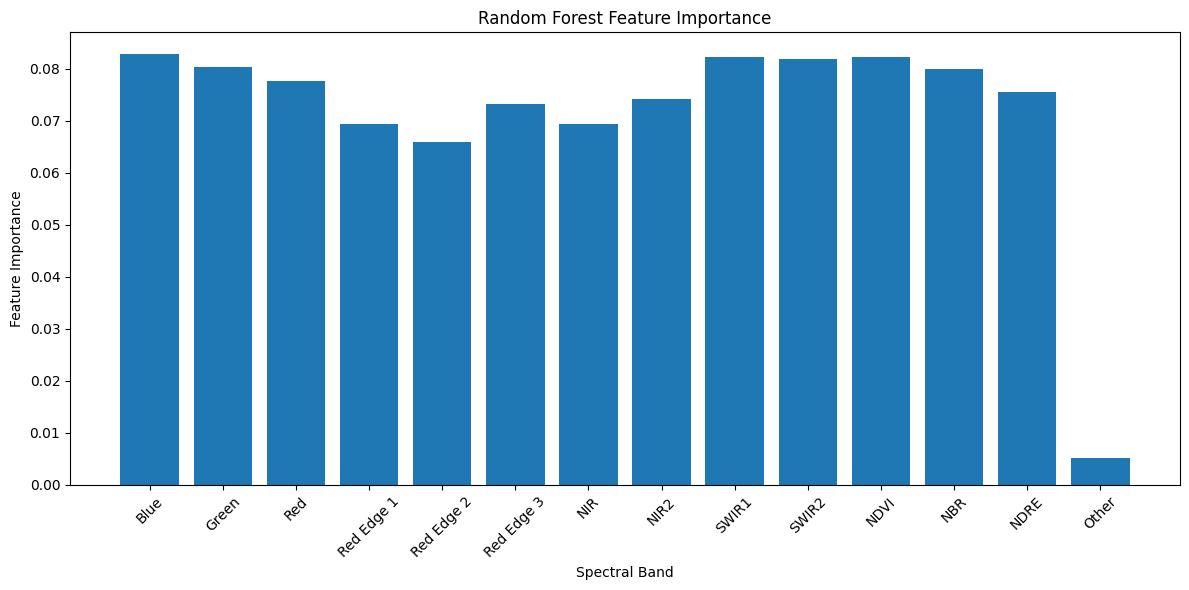

Random Forest model saved to rf_model.pkl


In [ ]:
# Random Forest (RF) Model with Class Balancing

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# X_train = np.load('/content/drive/My Drive/tree_migration_project/output/sentinel_X_train.npy')
# X_val = np.load('/content/drive/My Drive/tree_migration_project/output/sentinel_X_val.npy')
# y_train = np.load('/content/drive/My Drive/tree_migration_project/output/sentinel_y_train.npy')
# y_val = np.load('/content/drive/My Drive/tree_migration_project/output/sentinel_y_val.npy')

# weights to handle class imbalance
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {i: total_samples / (len(np.unique(y_train)) * count)
                for i, count in enumerate(class_counts) if count > 0}

print("Class weights:")
for species, idx in species_dict.items():
    if idx in class_weights:
        print(f"  {species}: {class_weights[idx]:.2f}")

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

accuracy = (y_pred_rf == y_val).mean()
print(f"\nRandom Forest Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf, target_names=species_names))

# confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=species_names, yticklabels=species_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/tree_migration_project/rf_confusion_matrix.png')
plt.show()

# feature importance
feature_importance = rf_model.feature_importances_
band_names = ['Blue', 'Green', 'Red', 'Red Edge 1', 'Red Edge 2', 'Red Edge 3',
             'NIR', 'NIR2', 'SWIR1', 'SWIR2', 'NDVI', 'NBR', 'NDRE', 'Other']
band_names = band_names[:len(feature_importance)]

plt.figure(figsize=(12, 6))
plt.bar(band_names, feature_importance)
plt.xlabel('Spectral Band')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/tree_migration_project/rf_feature_importance.png')
plt.show()

import pickle
with open('/content/drive/My Drive/tree_migration_project/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Random Forest model saved to rf_model.pkl")